<a href="https://colab.research.google.com/github/shivan-21/LIF-Model/blob/main/LIF_Part_One.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Import all Libraries
import numpy as np
import matplotlib.pyplot as plt

## Define Basic Variables EX 1

t_max = 0.15   # second
dt = 0.001      # second
tau = 0.02      # second
el = -60e-3      # milivolt
vr = -0.07     # milivolt
vth = -0.05     # milivolt
r =   100000000     # ohm
i_mean = 2.5e-10 # ampere


print(t_max, dt, tau, el, vr, vth, r, i_mean)
print(type(i_mean))

0.15 0.001 0.02 -0.06 -0.07 -0.05 100000000 2.5e-10
<class 'float'>


In [ ]:
# SIMULATE AN INPUT CURRENT EX 2

# Loop for 10 steps, variable 'step' takes values from 0 to 9
for step in range(10):

  # Compute value of t
  t = step * dt

  # Compute value of i at this time step
  i = i_mean * (1 + np.sin(200*np.pi*t))

  # Print value of i
  print(i)

2.5e-10
3.969463130731183e-10
4.877641290737885e-10
4.877641290737885e-10
3.9694631307311837e-10
2.5000000000000007e-10
1.0305368692688166e-10
1.2235870926211617e-11
1.223587092621159e-11
1.0305368692688186e-10


In [ ]:
## Exercise 3- Prinitng Pretty Numbers

# Initialize step_end
step_end = 10

# Loop for step_end steps
for step in range(step_end):

  # Compute value of t
  t = step * dt

  # Compute value of i at this time step
  i = i_mean * (1 + np.sin((t * 2 * np.pi) / 0.01))

  # Print value of t and i
  print(f"{t:.3f}, {i}")

0.000, 2.5e-10
0.001, 3.969463130731183e-10
0.002, 4.877641290737885e-10
0.003, 4.877641290737885e-10
0.004, 3.9694631307311837e-10
0.005, 2.5000000000000007e-10
0.006, 1.0305368692688176e-10
0.007, 1.2235870926211617e-11
0.008, 1.223587092621159e-11
0.009, 1.0305368692688186e-10


In [ ]:
# Exercise 4: Simulating membrane potential

# Initialize step_end and v0
step_end = 10
v = el

# Loop for step_end steps
for step in range(step_end):
  # Compute value of t
  t = step * dt

  # Compute value of i at this time step
  i = i_mean * (1 + np.sin((t * 2 * np.pi) / 0.01))

  # Compute v
  v = v + (dt / tau) * (el - v + r*i) # el -v(t)- R*i

  # Print value of t and v
  print(f"{t:.3f} {v:.4e}")

0.000 -5.8750e-02
0.001 -5.6828e-02
0.002 -5.4548e-02
0.003 -5.2381e-02
0.004 -5.0778e-02
0.005 -4.9989e-02
0.006 -4.9974e-02
0.007 -5.0414e-02
0.008 -5.0832e-02
0.009 -5.0775e-02


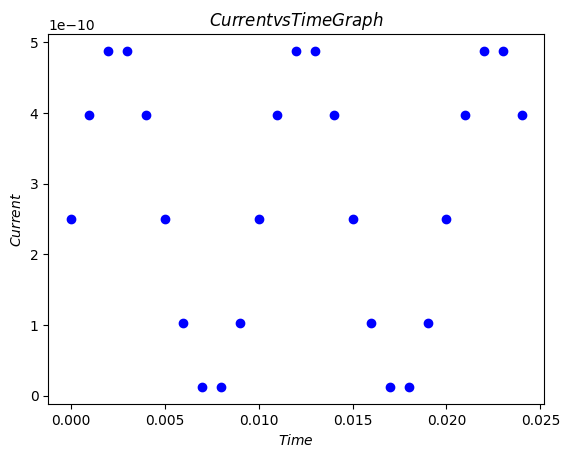

In [ ]:
## Exercise 5- Intro to Plotting: Current Plot

# Initialize step_end
step_end = 25

# Initialize the figure
plt.figure()
plt.title('$Current vs Time Graph$') # $ sign for matlab formatting
plt.xlabel('$Time$')
plt.ylabel('$Current$')

# Loop for step_end steps
for step in range(step_end):

  # Compute value of t
  t = step * dt

  # Compute value of i at this time step
  i = i_mean * (1 + np.sin((t * 2 * np.pi) / 0.01))

  # Plot i (use 'ko' to get small black dots (short for color='k' and marker = 'o'))
  plt.plot(t,i, 'bo', label= 'dot') # plot(x,y, dot_type', label= sm)

# Display the plot
plt.show()

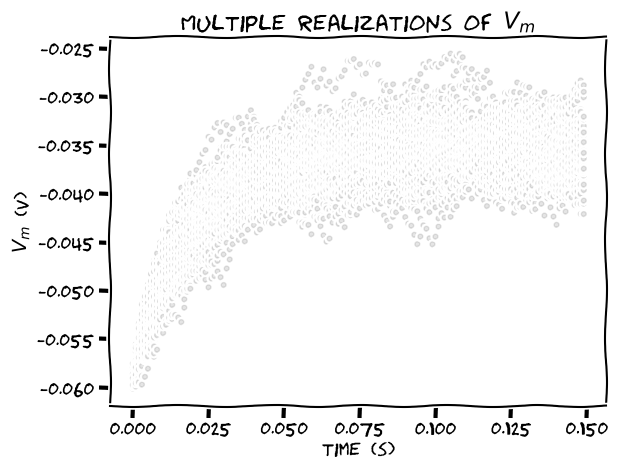

In [ ]:
## Storing simulations in lists EX 8

# Set random number generator
np.random.seed(2020)

# Initialize step_end and n
step_end = int(t_max / dt)
n = 50

# Intiatialize the list v_n with 50 values of membrane leak potential el
v_n = [el] * n  # cool trick- multiply lists to get a huge list.

with plt.xkcd():
  # Initialize the figure
  plt.figure()
  plt.title('Multiple realizations of $V_m$')
  plt.xlabel('time (s)')
  plt.ylabel('$V_m$ (V)')

  # Loop for step_end steps
  for step in range(step_end):

    # Compute value of t
    t = step * dt

    # Loop for n simulations
    for j in range(0, n):

      # Compute value of i at this time step
      i = i_mean * (1 + 0.1 * (t_max/dt)**(0.5) * (2* np.random.random() - 1))

      # Compute value of v for this simulation
      v_n[j] = v_n[j] + (dt / tau) * (el - v_n[j] + r*i)

    # Plot all simulations (use alpha = 0.1 to make each marker slightly transparent)
    plt.plot([t] * n, v_n, 'k.', alpha=0.1) # plot both iterables at once instead of one at a time

  # Display plot
  plt.show()

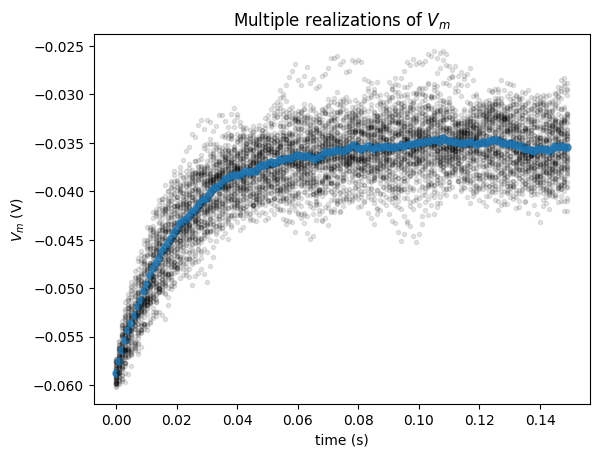

In [ ]:
# PLOTTING SAMPLE MEAN EX 9

# Set random number generator
np.random.seed(2020)

# Initialize step_end and n
step_end = int(t_max / dt)
n = 50

# Intiatialize the list v_n with 50 values of membrane leak potential el
v_n = [el] * n

# Initialize the figure
plt.figure()
plt.title('Multiple realizations of $V_m$')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

# Loop for step_end steps
for step in range(step_end):

  # Compute value of t
  t = step * dt

  # Loop for n simulations
  for j in range(0, n):
    # Compute value of i at this time step
    i = i_mean * (1 + 0.1 * (t_max/dt)**(0.5) * (2* np.random.random() - 1))
    # Compute value of v for this simulation
    v_n[j] = v_n[j] + (dt / tau) * (el - v_n[j] + r*i)

  # Compute sample mean by summing list of v_n using sum, and dividing by n
  v_mean = sum(v_n) / n # in-built function for lists

  # Plot simulations
  plt.plot(n*[t], v_n, 'k.', alpha=0.1)

  # Plot sample mean using alpha=0.8 and'C0.' for blue
  plt.plot(t, v_mean, 'C0.', alpha=0.8, markersize=10)

# Display plot
plt.show()

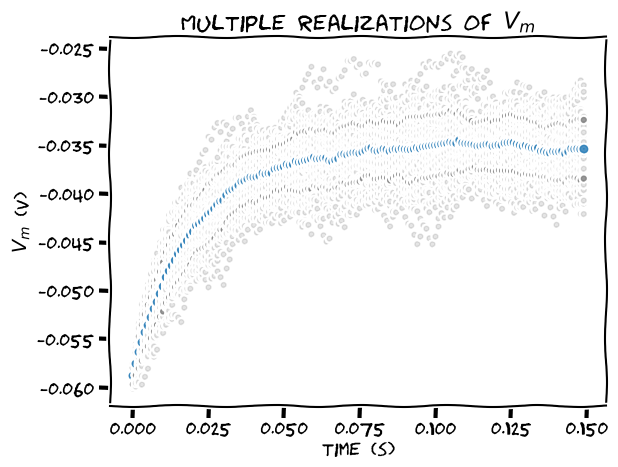

In [ ]:
# Exercise 10: Plotting sample standard deviation

# Set random number generator
np.random.seed(2020)

# Initialize step_end and n
step_end = int(t_max / dt)
n = 50

# Intiatialize the list v_n with 50 values of membrane leak potential el
v_n = [el] * n

with plt.xkcd():
  # Initialize the figure
  plt.figure()
  plt.title('Multiple realizations of $V_m$')
  plt.xlabel('time (s)')
  plt.ylabel('$V_m$ (V)')

  # Loop for step_end steps
  for step in range(step_end):

    # Compute value of t
    t = step * dt

    # Loop for n simulations
    for j in range(0, n):
      # Compute value of i at this time step
      i = i_mean * (1 + 0.1 * (t_max/dt)**(0.5) * (2* np.random.random() - 1))
      # Compute value of v for this simulation
      v_n[j] = v_n[j] + (dt / tau) * (el - v_n[j] + r*i)

    # Compute sample mean
    v_mean = sum(v_n) / n

    # Initialize a list `v_var_n` with the contribution of each V_n(t) to
    # Var(t) with a list comprehension over values of v_n
    v_var_n = [(v - v_mean)**2 for v in v_n]

    # Compute sample variance v_var by summing the values of v_var_n with sum and dividing by n-1
    v_var = sum(v_var_n) / (n - 1)

    # Compute the standard deviation v_std with the function np.sqrt
    v_std = np.sqrt(v_var)

    # Plot simulations
    plt.plot(n*[t], v_n, 'k.', alpha=0.1)

    # Plot sample mean using alpha=0.8 and'C0.' for blue
    plt.plot(t, v_mean, 'C0.', alpha=0.8, markersize=10)

    # Plot mean + standard deviation with alpha=0.8 and argument 'C7.'
    plt.plot(t, v_mean + v_std, 'C7.', alpha=0.8)

    # Plot mean - standard deviation with alpha=0.8 and argument 'C7.'
    plt.plot(t, v_mean - v_std, 'C7.', alpha=0.8)


  # Display plot
  plt.show()

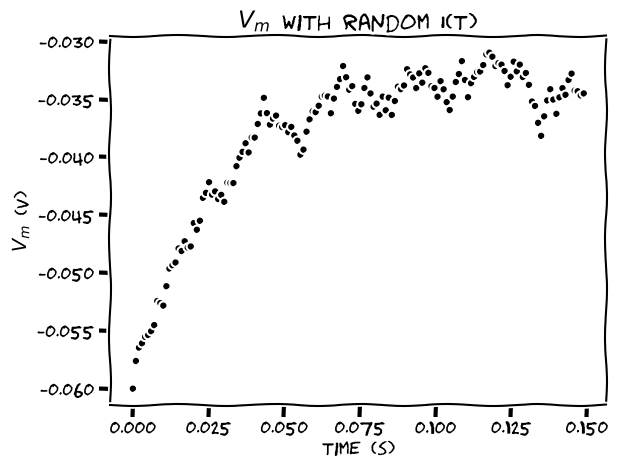

In [ ]:
## Re-write with Numpy- one EX 11


# Set random number generator
np.random.seed(2020)

# Initialize step_end, t_range, v
step_end = int(t_max / dt) - 1
t_range = np.linspace(0, t_max, num=step_end, endpoint=False)
v = el * np.ones(step_end)

# Simulate current over time
i = i_mean * (1 + 0.1 * (t_max/dt) ** (0.5) * (2 * np.random.random(step_end) - 1))

# Loop for step_end steps
for step in range(1, step_end):

  # Compute v as function of i
  v[step] = v[step - 1] + (dt / tau) * (el - v[step - 1] + r * i[step])


# Plot membrane potential
with plt.xkcd():
  plt.figure()
  plt.title('$V_m$ with random I(t)')
  plt.xlabel('time (s)')
  plt.ylabel('$V_m$ (V)')

  plt.plot(t_range, v, 'k.')
  plt.show()

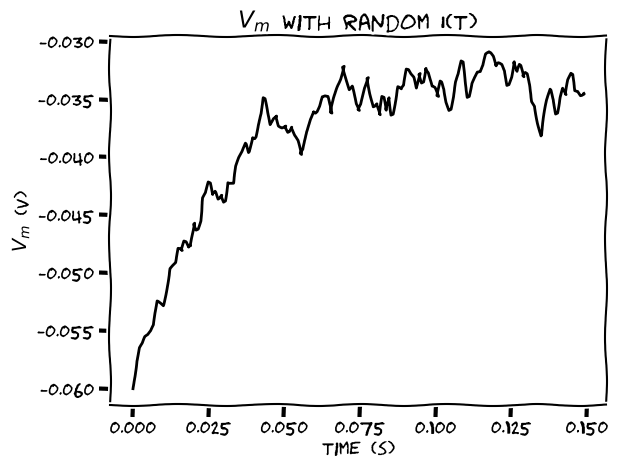

In [ ]:
# EXERCISE 12 ENUMERATE AND INDEXING

# Set random number generator
np.random.seed(2020)

# Initialize step_end, t_range, v
step_end = int(t_max / dt) - 1
t_range = np.linspace(0, t_max, num=step_end, endpoint=False)
v = el * np.ones(step_end)

# Simulate current over time
i = i_mean * (1 + 0.1 * (t_max/dt) ** (0.5) * (2 * np.random.random(step_end) - 1))

# Loop for step_end values of i using enumerate
for step, i_step in enumerate(i):

  # Skip first iteration
  if step==0:
    continue

  # Compute v as function of i using i_step
  v[step] = v[step - 1] + (dt / tau) * (el - v[step - 1] + r * i_step)

# Plot figure
with plt.xkcd():
  plt.figure()
  plt.title('$V_m$ with random I(t)')
  plt.xlabel('time (s)')
  plt.ylabel('$V_m$ (V)')

  plt.plot(t_range, v, 'k')
  plt.show()

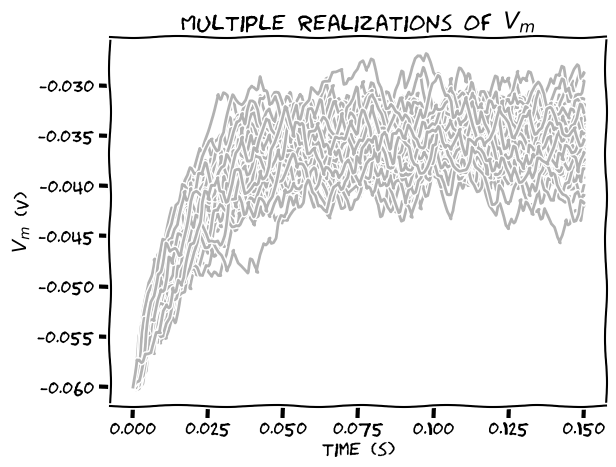

In [ ]:
## Using 2D arrays EX 13

# Set random number generator
np.random.seed(2020)

# Initialize step_end, n, t_range, v and i
step_end = int(t_max / dt)
n = 50
t_range = np.linspace(0, t_max, num=step_end)
v_n = el * np.ones([n, step_end])
i = i_mean * (1 + 0.1 * (t_max / dt)**(0.5) * (2 * np.random.random([n, step_end]) - 1))

# Loop for step_end - 1 steps
for step in range(1, step_end):

   # Compute v_n
   v_n[:, step] = v_n[:, step - 1] + (dt / tau) * (el - v_n[:, step - 1] + r * i[:, step])

# Plot figure
with plt.xkcd():
  plt.figure()
  plt.title('Multiple realizations of $V_m$')
  plt.xlabel('time (s)')
  plt.ylabel('$V_m$ (V)')

  plt.plot(t_range, v_n.T, 'k', alpha=0.3)
  plt.show()

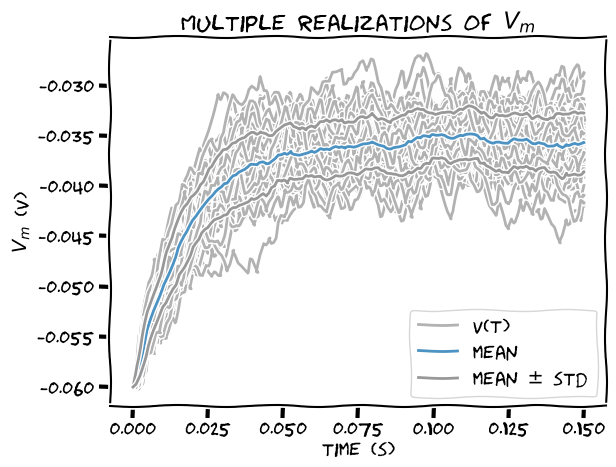

In [ ]:
# EX 13 PLOT SAMPLE MEAN AND VARIATION

# Sample mean and standard Deviation

# Set random number generator
np.random.seed(2020)

# Initialize step_end, n, t_range, v and i
step_end = int(t_max / dt)
n = 50
t_range = np.linspace(0, t_max, num=step_end)
v_n = el * np.ones([n, step_end])
i = i_mean * (1 + 0.1 * (t_max / dt)**(0.5) * (2 * np.random.random([n, step_end]) - 1))

# Loop for step_end - 1 steps
for step in range(1, step_end):

  # Compute v_n
  v_n[:, step] = v_n[:, step - 1] + (dt / tau) * (el - v_n[:, step - 1] + r * i[:, step])

# Compute sample mean (use np.mean)
v_mean = np.mean(v_n, axis=0)

# Compute sample standard deviation (use np.std)
v_std = np.std(v_n, axis=0)

# Plot figure
with plt.xkcd():
  plt.figure()
  plt.title('Multiple realizations of $V_m$')
  plt.xlabel('time (s)')
  plt.ylabel('$V_m$ (V)')

  plt.plot(t_range, v_n.T, 'k', alpha=0.3)

  plt.plot(t_range, v_n[-1], 'k', alpha=0.3, label='V(t)')
  plt.plot(t_range, v_mean, 'C0', alpha=0.8, label='mean')
  plt.plot(t_range, v_mean+v_std, 'C7', alpha=0.8)
  plt.plot(t_range, v_mean-v_std, 'C7', alpha=0.8, label='mean $\pm$ std')

  plt.legend()
  plt.show()